In [50]:
import pandas as pd

df = pd.read_csv("heart_disease_proc.csv")

In [51]:
df.columns

Index(['Unnamed: 0', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2',
       'slope_3', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0', 'target'],
      dtype='object')

In [52]:
df = df.drop("Unnamed: 0",axis=1)

In [53]:
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,target
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [54]:
X=df.drop("target",axis=1)

In [55]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
y=df["target"]

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
X_all_feature = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [2.45298598e-01 1.39013583e-01 1.01531249e-01 9.22741215e-02
 6.41516867e-02 5.76802443e-02 5.16323455e-02 3.90339646e-02
 3.39315802e-02 3.06652265e-02 2.72829385e-02 2.55751507e-02
 2.38461223e-02 1.84857086e-02 1.37105804e-02 9.91804999e-03
 8.87858649e-03 7.77884615e-03 7.26987695e-03 2.04154053e-03
 1.32879219e-33 1.32879219e-33 1.32879219e-33 1.32879219e-33
 1.32879219e-33 1.32879219e-33 1.32879219e-33 1.32879219e-33]
Total variance explained: 0.9999999999999999


In [58]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

print("Explained variance ratio:", pca_2d.explained_variance_ratio_)
print("Total variance explained:", pca_2d.explained_variance_ratio_.sum())

Explained variance ratio: [0.2452986  0.13901358]
Total variance explained: 0.3843121806403941


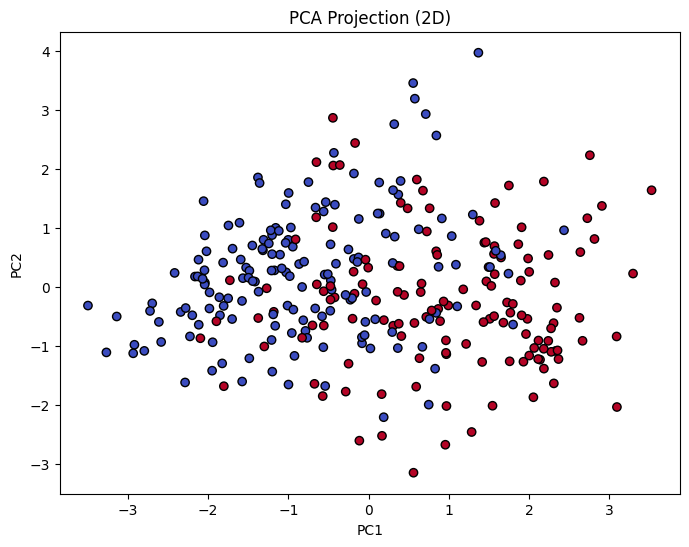

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (2D)")
plt.show()

In [60]:
pca_10 = PCA(n_components=6)
X_reduced = pca_10.fit_transform(X)


print("Explained variance ratio:", pca_10.explained_variance_ratio_)
print("Total variance explained:", pca_10.explained_variance_ratio_.sum())

Explained variance ratio: [0.2452986  0.13901358 0.10153125 0.09227412 0.06415169 0.05768024]
Total variance explained: 0.6999494826031708


In [61]:
pca_95_percent = PCA(n_components=0.95)
X_95_percent = pca_95_percent.fit_transform(X)


print("Number of selected components:", pca_95_percent.n_components_)
print("Explained variance ratio:", pca_95_percent.explained_variance_ratio_)
print("Total variance explained:", pca_95_percent.explained_variance_ratio_.sum())

Number of selected components: 14
Explained variance ratio: [0.2452986  0.13901358 0.10153125 0.09227412 0.06415169 0.05768024
 0.05163235 0.03903396 0.03393158 0.03066523 0.02728294 0.02557515
 0.02384612 0.01848571]
Total variance explained: 0.9504025195266953


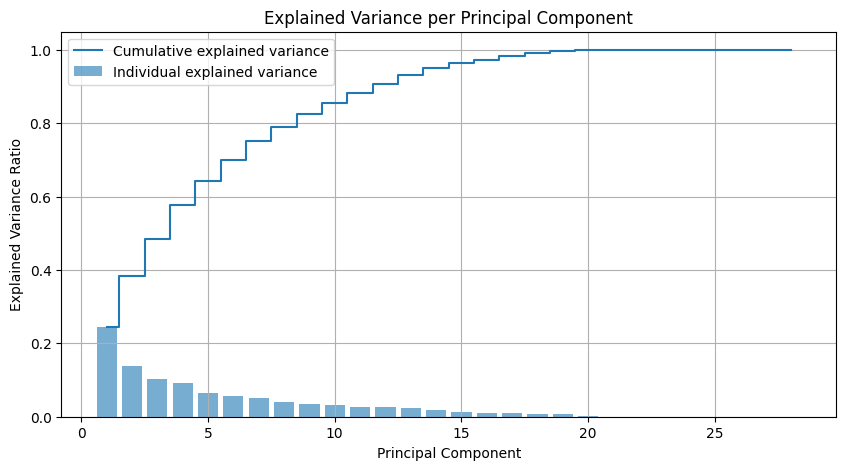

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10,5))

plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label="Individual explained variance")

plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where="mid", label="Cumulative explained variance")

# Formatting
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance per Principal Component")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [66]:
import pandas as pd

New_X=pd.DataFrame(X_95_percent,columns=[f"PC{i+1}" for i in range(14)])
df = pd.concat([New_X, y], axis=1)


In [67]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,target
0,1.087992,0.372638,-1.271275,-0.240135,0.576431,-0.856537,-0.603891,-0.614801,-0.541453,-0.245773,0.736680,0.686322,-0.640268,0.368900,0
1,2.813771,0.807979,0.120024,-0.558623,-0.570164,0.825947,-0.571407,0.003537,-0.490289,-0.185441,0.161555,-0.754878,-0.485284,-0.437692,1
2,2.329030,-1.089585,0.474496,-0.027767,0.031975,-1.028541,-0.443364,0.631092,0.359245,-0.250978,0.287731,0.055109,0.039899,0.056094,1
3,-1.163143,-0.662409,-1.579279,2.340236,1.617635,-0.380933,0.506575,-0.384098,-0.565434,0.351726,0.162886,-0.532354,-0.092187,-0.393656,0
4,-1.749042,-0.197127,-0.929031,0.555730,0.824813,0.459967,-0.946655,0.539861,-0.350032,-0.043926,-0.498762,0.214697,0.208312,0.900747,0


In [68]:
df.to_csv("heart_disease_pca.csv")